In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/DELL/OneDrive/Documents/churn/Bankchurn.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
df["Churn"] = df["Attrition_Flag"].str.strip().apply(lambda x: 0 if x == "Existing Customer" else 1)

In [4]:
df.drop(columns = ["CLIENTNUM", "Attrition_Flag"], inplace = True)
df.shape

(10127, 20)

In [5]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.160660
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.367235
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000


In [6]:
#df.columns

In [7]:
# Numerical features
Num_Features = ["Customer_Age", "Dependent_count", "Months_on_book", "Total_Relationship_Count",
               "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Credit_Limit", "Total_Revolving_Bal",
               "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1",
               "Avg_Utilization_Ratio"]

In [8]:
# Categorical Features

Cat_Features = ["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]

In [9]:
#df["Income_Category"].unique()

In [10]:
df["Income_Category"] = df["Income_Category"].str.strip().replace({
    '$60K - $80K': '60k - 80k',
    '$80K - $120K': '80k - 120k',
    '$40K - $60K': '40k - 60k',
    '$120K +': '>= 120k',
    'Less than $40K': '<= 40k',
    'Unknown': 'Unknown'
})

### EDA
> Target Variable
>> Numerical Variables
>>> Categorical Variables

<Figure size 1200x1200 with 0 Axes>

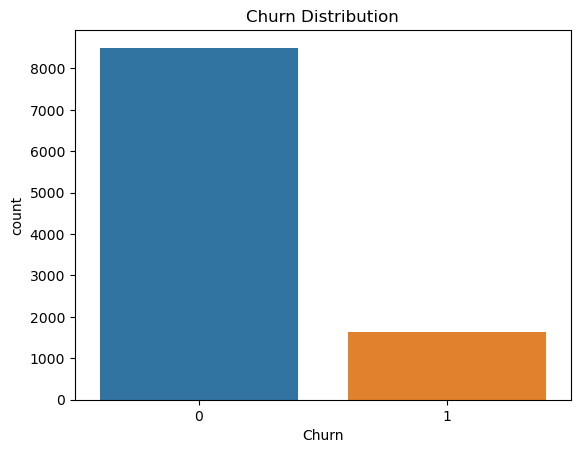

In [11]:
plt.figure(figsize = (12, 12))
plt.subplots(1, 1)
sns.countplot(x = "Churn", data = df)
plt.title("Churn Distribution");

In [12]:
# Percentage of churn
df_churn = df[df["Churn"] == 1]
count_df = len(df)
len(df_churn)/count_df

0.1606596227905599

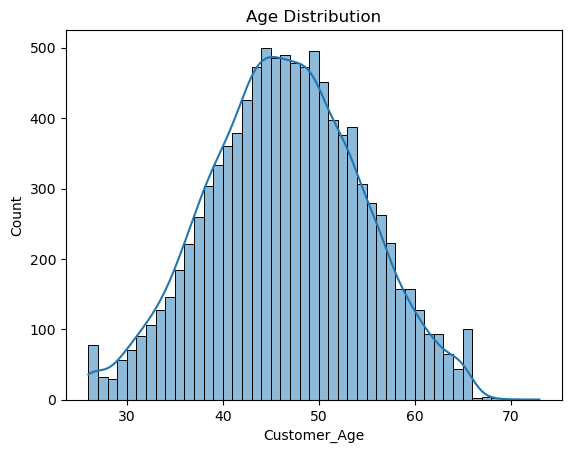

In [13]:
plt.subplot(1, 1, 1)
sns.histplot(df["Customer_Age"], kde = True)
plt.title("Age Distribution");

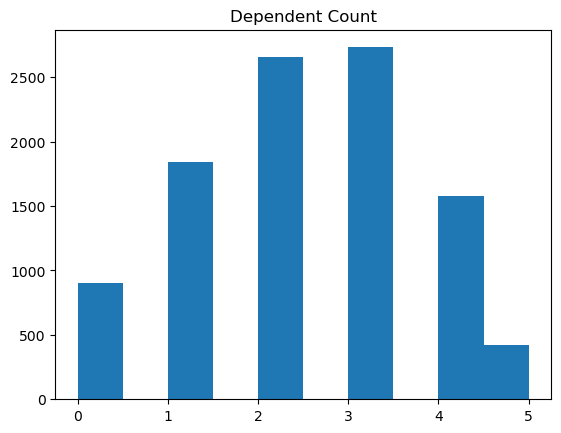

In [14]:
plt.subplot(1, 1, 1)
plt.hist(df["Dependent_count"])
xlabel = ("Number of Dependents")
plt.title("Dependent Count");

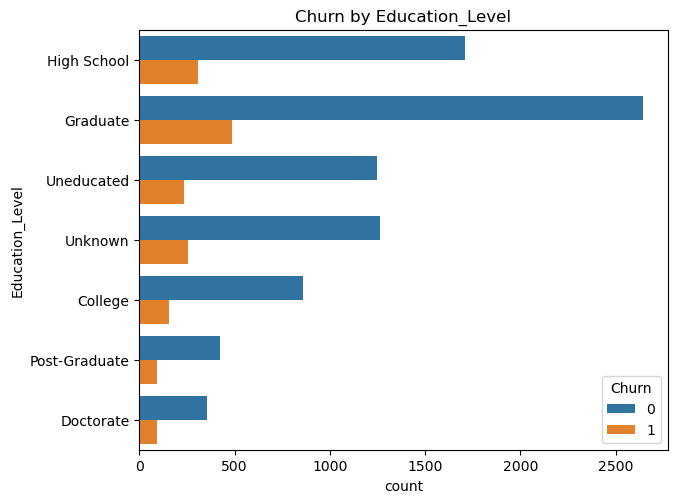

In [15]:
plt.figure(figsize = (15, 12))
plt.subplot(2, 2, 3)
sns.countplot(y = "Education_Level", hue = "Churn", data = df)
plt.title("Churn by Education_Level");

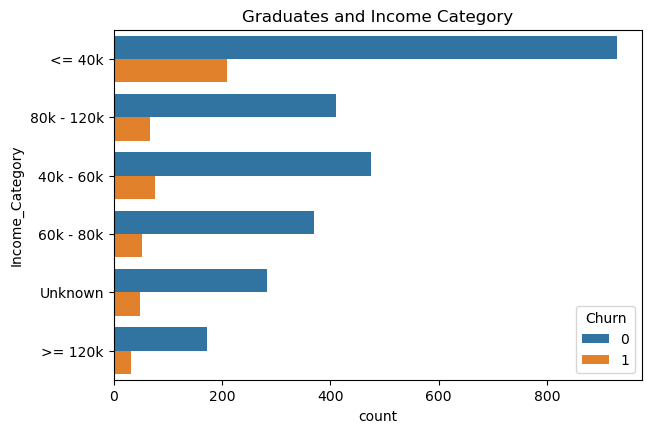

In [16]:
df_Graduate = df[df["Education_Level"] == "Graduate"]

plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 3)
sns.countplot(y = "Income_Category", hue = "Churn", data = df_Graduate)
plt.title("Graduates and Income Category");

> Graduates who earn less, are more likely to churn

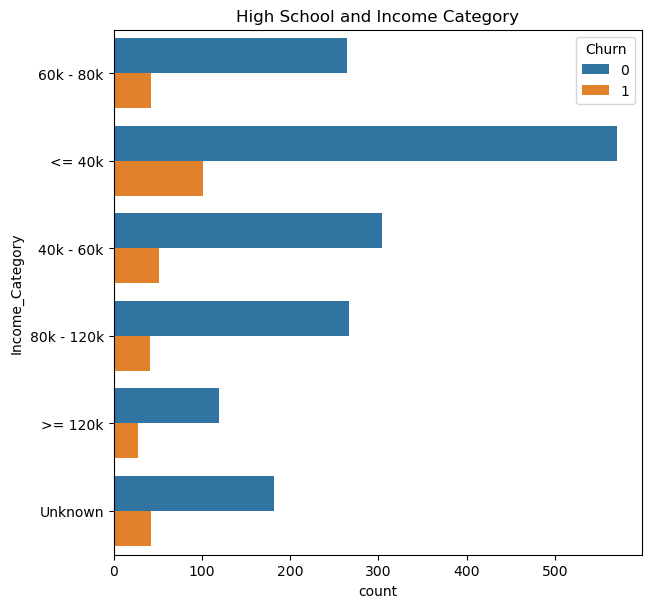

In [17]:
df_High_School = df[df["Education_Level"] == "High School"]

plt.figure(figsize = (15, 15))
plt.subplot(2, 2, 3)
sns.countplot(y = "Income_Category", hue = "Churn", data = df_High_School)
plt.title("High School and Income Category");

> High school leavers who earn less are more likely to churn

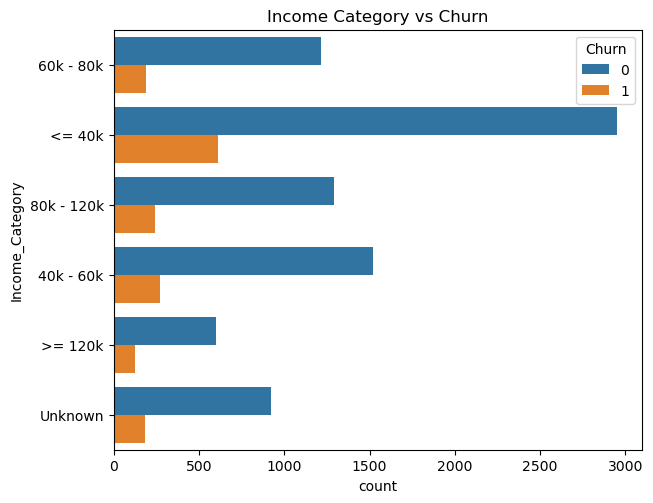

In [18]:
plt.figure(figsize = (15, 12))
plt.subplot(2, 2, 3)
sns.countplot(y = "Income_Category", hue = "Churn", data = df)
plt.title("Income Category vs Churn");

> 38% of the churn customers earn less

In [19]:
df_churn = df[df["Churn"] == 1]
len(df_churn)

1627

In [20]:
df_Churn_earnless = df[(df["Income_Category"] == "<= 40k") & (df["Churn"] == 1)]
len(df_Churn_earnless)

612

In [21]:
len(df_Churn_earnless)/len(df_churn)

0.3761524277811924

### Feature Engineering

In [22]:
# Create new features that might be predictive
df['Credit_Usage_Ratio'] = df['Total_Revolving_Bal'] / (df['Credit_Limit'] + 1)
df['Avg_Transaction_Value'] = df['Total_Trans_Amt'] / (df['Total_Trans_Ct'] + 1)
df['Inactivity_Ratio'] = df['Months_Inactive_12_mon'] / 12
df['Contacts_Per_Month'] = df['Contacts_Count_12_mon'] / 12

In [23]:
# Update numerical features list with new features
Num_Features.extend(['Credit_Usage_Ratio', 'Avg_Transaction_Value', 
                         'Inactivity_Ratio', 'Contacts_Per_Month'])

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, auc)
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Data Preprocessing Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, Num_Features),
        ('cat', categorical_transformer, Cat_Features)])

In [27]:
# Split data into train and test sets
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

In [28]:
# # Check class distribution
# print("\nClass Distribution in Training Set:")
# print(y_train.value_counts(normalize=True))

### Model Building

In [29]:
# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

In [30]:
# 1. Create the proper pipeline
rf_pipeline = imbpipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 2. Define parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# 3. Create GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# 4. Fit the model
grid_search.fit(X_train, y_train)

# 5. Print results
print("\nBest Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best ROC AUC Score: 0.9871785434541387


In [31]:
# Final Model Evaluation
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2551
           1       0.86      0.86      0.86       488

    accuracy                           0.96      3039
   macro avg       0.92      0.92      0.92      3039
weighted avg       0.96      0.96      0.96      3039


Confusion Matrix:
[[2484   67]
 [  69  419]]



ROC AUC Score: 0.9842250869154494
Accuracy: 0.9552484369858506
Precision: 0.8621399176954733
Recall: 0.8586065573770492
F1 Score: 0.8603696098562629


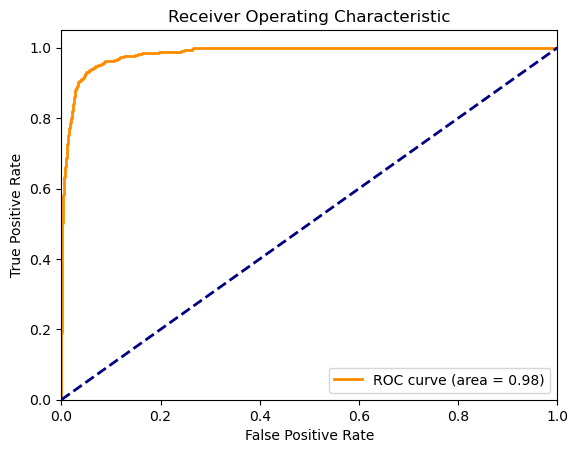

In [32]:
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

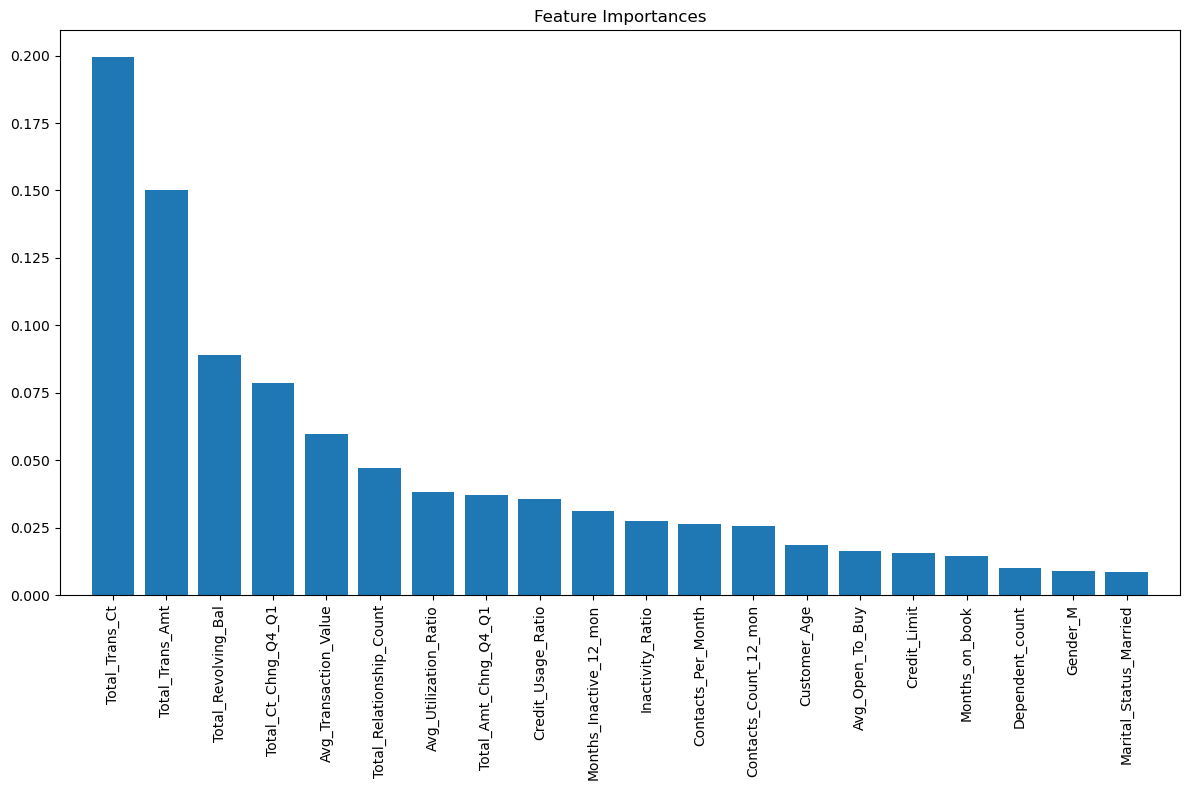

In [34]:
# Feature Importance
# Get feature names after one-hot encoding
preprocessor.fit(X_train)
feature_names = Num_Features.copy()

# Add one-hot encoded feature names
ohe_features = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(Cat_Features)
feature_names.extend(ohe_features)

# Get feature importances
importances = best_model.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(len(indices[:20])), importances[indices[:20]], align="center")
plt.xticks(range(len(indices[:20])), np.array(feature_names)[indices[:20]], rotation=90)
plt.xlim([-1, 20])
plt.tight_layout()
plt.show()

In [35]:
# Save the model
joblib.dump(best_model, 'cus_churn_model.pkl')

['cus_churn_model.pkl']